Análise e Reconhecimento de Padrões
===
Exercício PCA (preparo ao projeto 3):
    
    
1. ter distribuição circular de pontos uniformemente distribuidos:  gerar N pontos por rand(-1,1) e testar a distância ao centro das coordenadas, mantendo apenas    os pontos de distância menor ou igual a 1;
2.  Y = Y * 0.2 (comprime os dados verticalmente para 1/5);
3.  Rotacionar os pontos usando [cos(30) sin(30); sin(30) cos(30)];
4.  Visualizar os dados, para ver se está parecido com Figura 9, CDT-24;
5.  Obter matriz de covariância K dos dados gerados;
6.  Obter autovalores/autovetores de K;
7.  Ordenar decrescentemente os autovelores juntamente com autovatores;
8.  Obter matriz Q usando autovalores como linhas;
9.  Aplicar nos dados e mostrar novo resultado.

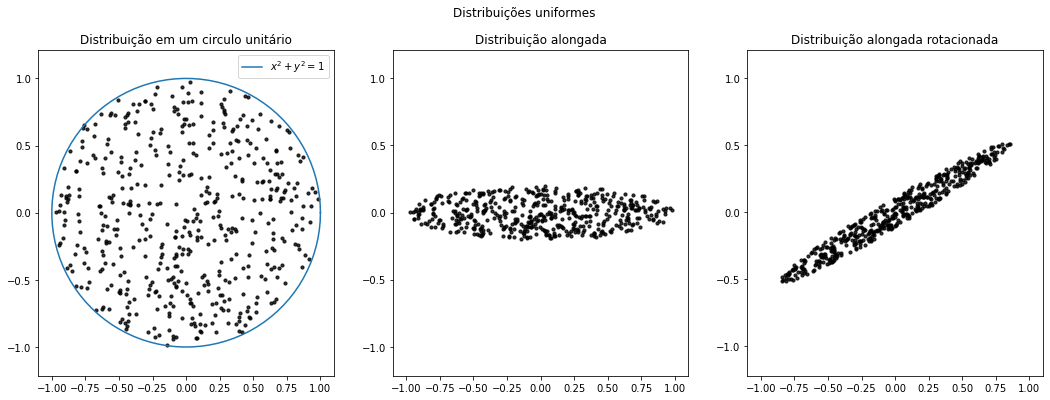

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 500
circle = [[],[]]
dist_x, dist_y = [], [] 

while len(dist_x) <= N:
    # Gera uma distribuição normal entre [-1,1]
    x,y = np.random.rand(2)*2 -1
    #verifica se o ponto esta num circulo unitário de raio 1
    if x**2+y**2 <=1:
        circle[0].append(x)
        circle[1].append(y)
        dist_x.append(x)
        dist_y.append(y*0.2) 
        
#matriz de rotação         
rot = [[np.cos(np.pi/6), np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]]   
#faz a rotação
result = np.dot(rot, [dist_x,dist_y])

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6), sharex=True)
fig.suptitle("Distribuições uniformes")
ax[0].set_title("Distribuição em um circulo unitário")
ax[1].set_title("Distribuição alongada")
ax[2].set_title("Distribuição alongada rotacionada")

for i in range(3):
    ax[i].axis('equal')

an = np.linspace(0, 2 * np.pi, 100)
ax[0].plot(np.cos(an), np.sin(an), label= "$x^2+y^2=1$")
ax[0].scatter(circle[0],circle[1],color = "black" , alpha = 0.8, s = 10)
ax[1].scatter(dist_x, dist_y, color = "black", alpha = 0.8, s = 10)
ax[2].scatter(result[0], result[1], color = "black", alpha = 0.8, s = 10)
# plt.savefig("images/uniform_dist.png")
ax[0].legend()
plt.show()

---
## Matriz de covariância K

Matriz de covariância K:
 [[4.75       4.42166667 4.35333333 ... 2.915      2.475      2.6       ]
 [4.42166667 4.14916667 4.055      ... 2.95583333 2.50416667 2.62833333]
 [4.35333333 4.055      3.99       ... 2.68833333 2.28166667 2.39666667]
 ...
 [2.915      2.95583333 2.68833333 ... 4.18916667 3.65083333 3.835     ]
 [2.475      2.50416667 2.28166667 ... 3.65083333 3.20916667 3.375     ]
 [2.6        2.62833333 2.39666667 ... 3.835      3.375      3.55      ]]

                   lambda_1             lambda_2
Valor  559.820621+0.000000j  96.528492+0.000000j

v1 = [ 0.07708907+0.j         -0.12142147+0.j         -0.00161714+0.j
  0.0393898 +0.02372186j  0.0393898 -0.02372186j  0.07325898+0.02378015j
  0.07325898-0.02378015j -0.00745941+0.10246087j -0.00745941-0.10246087j
 -0.07366675+0.05488265j -0.07366675-0.05488265j -0.04279519-0.02007071j
 -0.04279519+0.02007071j -0.02945606-0.01563325j -0.02945606+0.01563325j
  0.00372492+0.j          0.12340279-0.07530946j  0.12340279+0.07530

<ipython-input-10-5bba52e98ade>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.quiver(*[0,0], *eigenvector[:,0], width = 0.004, color = "red", label= "$\~x $, $\lambda_1 = %.3f$"%eigenvalue[0])


TypeError: quiver() takes 2-5 positional arguments but 152 were given

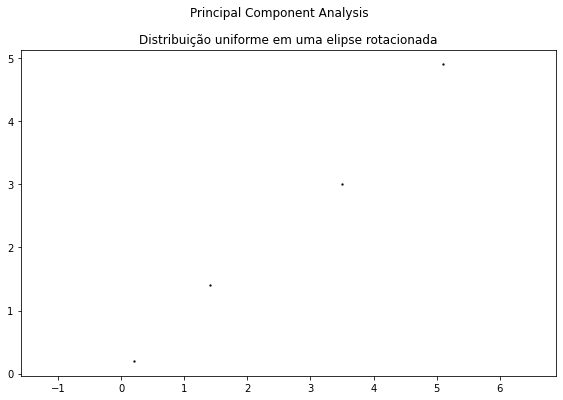

In [10]:
K = np.cov(result)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalue, eigenvector = np.linalg.eig(K)

if eigenvalue[0]<eigenvalue[1]: #garante ordem decrescente para o caso N=2
    eigenvalue[::-1]
    eigenvector[::-1]
    if (len(eigenvalue)>2):
        print("Sort Error")


lambdas = {"lambda_1":eigenvalue[0],"lambda_2":eigenvalue[1]}
print(pd.DataFrame(lambdas, index = ["Valor"]))
print()
print("v1 = %s\nv2 = %s" %(eigenvector[0],eigenvector[1]))

#plot
fig, ax = plt.subplots(1, 1, figsize=(9.6, 6))
fig.suptitle("Principal Component Analysis")
ax.set_title("Distribuição uniforme em uma elipse rotacionada")
ax.axis('equal')
ax.scatter(result[0], result[1], color = "black", alpha = 0.8, s = 2)
ax.quiver(*[0,0], *eigenvector[:,0], width = 0.004, color = "red", label= "$\~x $, $\lambda_1 = %.3f$"%eigenvalue[0])
ax.quiver(*[0,0], *eigenvector[:,1], width = 0.004, color = "blue", label= "$\~y  $, $\lambda_2 = %.3f$"%eigenvalue[1])
plt.legend()
plt.show()

# Base transform

[[ 0.07112952 -0.76001302  0.59681831 ... -0.60287507  0.85767923
  -0.02338993]
 [ 0.12173047 -0.42935784  0.36420087 ... -0.27497545  0.50727254
   0.01464214]]
(2, 501)
(150,)


ValueError: shapes (150,) and (2,501) not aligned: 150 (dim 0) != 2 (dim 0)

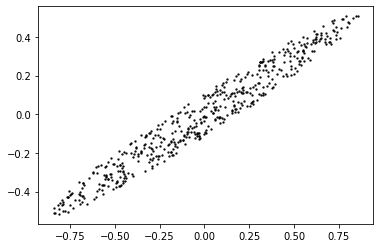

In [14]:
print(result)
print(result.shape)
print(eigenvalue.shape)
plt.scatter(result[0], result[1], color = "black", alpha = 0.8, s = 2)
# plt.plot()
print(np.dot(eigenvalue, result).shape)
PCA = result

In [9]:
import seaborn as sb
import 
class PCA:
    
    def __init__(self, Data, StandardScale = True, targets = None):
        
        self.targets = targets
        
        if StandardScale == True:
            self._data = Data
            self.Data = self.Standardize(Data)
        else:
            self.Data = Data
            
        self.eigenvalues, self.eigenvectors = self._Eigen()
        self.PrincipalComponents = self._New_PCA_base()
        
        
    
    def Standardize(self, data):
        from sklearn.preprocessing import StandardScaler
        return StandardScaler().fit_transform(data)
    
    def _Eigen(self):
        
        K = np.cov(self.Data.transpose())
#         print("Matriz de covariância K calculada:\n %s\n"%K)
        eigenvalues, eigenvectors = np.linalg.eig(K)

        #sorting the values decreasing order
        idx = eigenvalues.argsort()[::-1]   
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]
        
        return eigenvalues, eigenvectors
    
    def _New_PCA_base(self):
        
        principal_comp = []
        for eigenvectorT in (self.eigenvectors.transpose()):
            principal_comp.append(self.Data.dot(eigenvectorT))

        principal_comp = np.array(principal_comp)
        return principal_comp
    
    def PCA_2D(self, show = True):
        if self.targets.all != None:
            print(self.PrincipalComponents.shape)
            Data_2D = pd.DataFrame(data = self.PrincipalComponents[:2].transpose(), columns=['Principal component 1', 'Principal component 2'])
            Data_2D = pd.concat([Data_2D, self.targets], axis = 1)
            if show == True:
                self.ax = sb.scatterplot(Data_2D)
                plt.show()
        else:
            Data_2D = self.PrincipalComponents[:2].transpose()
            self.ax = plt.scatter(Data_2D[1],Data_2D[0])
#             plt.xlim(-1/2,1/2)
#             plt.ylim(-1/2,1/2)
            plt.show()
        return Data_2D 
    
    def Show(self):
        self.ax.plot()
        plt.show()
        return self.ax
    
iris= pd.read_csv('iris.cvs')
result = iris.drop(['species'], axis=1, inplace = False)
result = result.values
# print(result.shape)
dist_PCA = PCA(result, StandardScale =True, targets=iris['species'])
_ = dist_PCA.PCA_2D()
# print(_.shape)

ModuleNotFoundError: No module named 'sklearn'